## Time Series Forecasting with ARIMA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company Stock and Investment.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793
1983,2017-11-15,-0.007006,0.005963,-0.013190,-0.008928


In [5]:
#Converting Date into Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [6]:
df.dtypes

Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object

In [7]:
# Creating the first model
df1 = df[['Date','Gold Investments']]

In [8]:
#Checking the top five rows
df1.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [9]:
#Checking the top five rows
df1.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [10]:
#Checking the last five rows
df1.tail()

,Date,Gold Investments
1979,2017-09-11,0.000623
1980,2017-10-11,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621
1983,2017-11-15,0.005963


In [11]:
#Checking for null values
df1.isnull().values.any()

False

In [12]:
#checking the null values in columns
df1.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [13]:
df1.set_index('Date',inplace=True)
df1.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [14]:
df1.isnull().sum()

Gold Investments    0
dtype: int64

In [15]:
df1.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


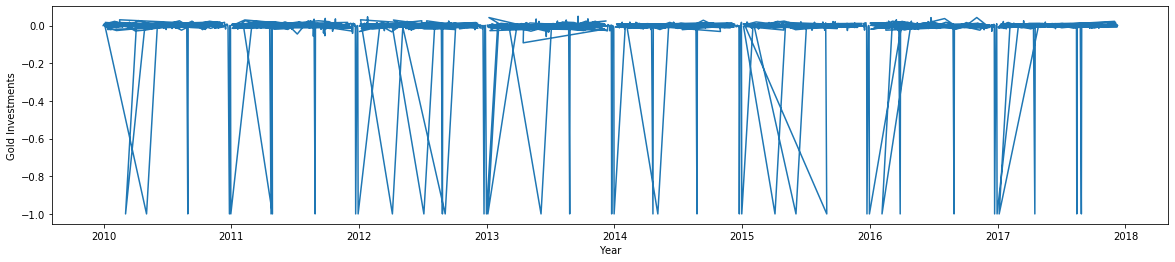

In [16]:
# plot gold investment over all years
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Gold Investments')
plt.plot(df1.index, df1['Gold Investments']);

Initial thoughts on data: there's a strong trend throughout the data, with extreme fluctuations. Will need to look closer at the data using a shorter time frame to see why gold investemnt as low as -1-0.04 on some days. I don't see any annual seasonal trends.

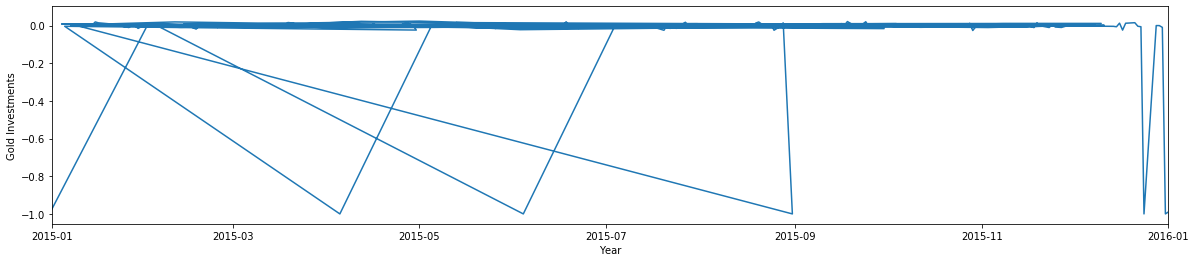

In [17]:
# Gold Investment  for 2015
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2016,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Gold Investments')
plt.plot(df1.index, df1['Gold Investments']);

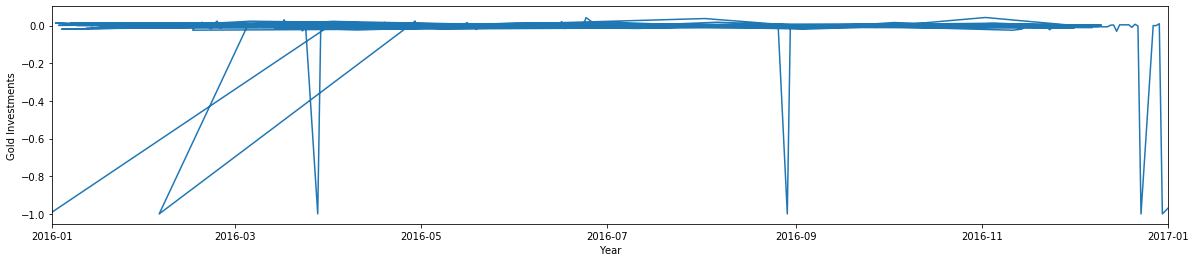

In [18]:
# Gold Investment for 2016
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2017,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Gold Investments')
plt.plot(df1.index, df1['Gold Investments']);

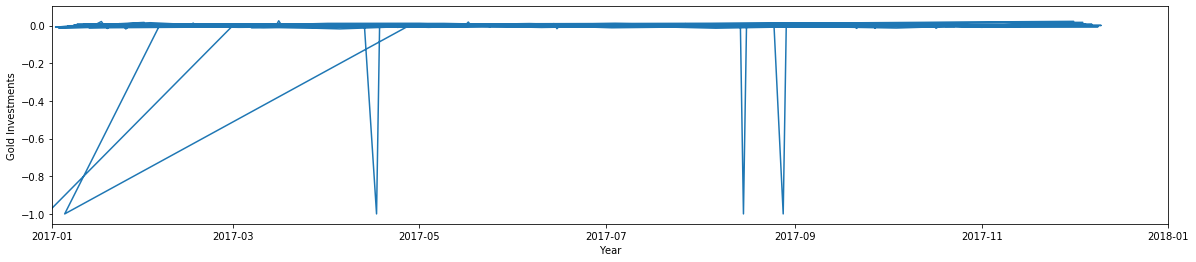

In [19]:
# Gold Investment for 2017
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2018,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Gold Investments')
plt.plot(df1.index, df1['Gold Investments']);

In [20]:
df1.skew()

Gold Investments   -6.776356
dtype: float64

In [21]:
# Treating Skewness via square root method.
df1.skew()
for col in df1.skew().index:
    if col in df1.describe().columns:
        if df1[col].skew()< -0.55:
            df1[col]=np.sqrt(df1[col])

In [22]:
df1.skew()

Gold Investments    0.340087
dtype: float64

In [23]:
df1.isnull().sum()

Gold Investments    962
dtype: int64

In [24]:
# Let's drop null values
print('Initial Shape ::', df1.shape)
df1.dropna(axis=0, how='any', inplace=True)
print('Final Shape ::', df1.shape)

Initial Shape :: (1984, 1)
Final Shape :: (1022, 1)


## Step 2: Visualize the Data

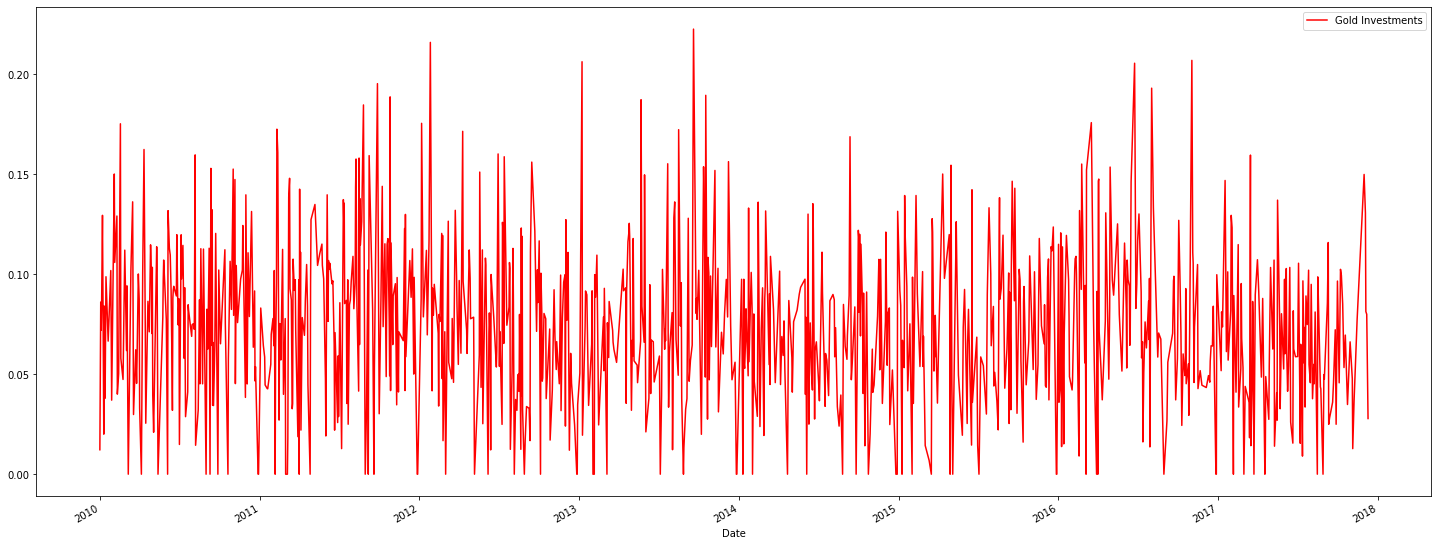

In [25]:
df1.plot(figsize=(25,10),color='r')

## In above plot data looks like seasonal data ,as every year stock goes up and down at a particular month 

## Now we will check if data is stationary or not.

In [26]:
# Testing for Stationary
from statsmodels.tsa.stattools import adfuller

In [27]:
#adfuller gives us five results
test_result = adfuller(df1['Gold Investments'].dropna())

In [28]:
# Just showing the output of test_result
print("The Values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' \n\n", test_result)

The Values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' 

 (-5.729998364918235, 6.634157965115118e-07, 18, 1003, {'1%': -3.436886505235454, '5%': -2.8644259034265493, '10%': -2.568306590825728}, -3597.1698633417136)


## Most Important value is p-value above

In [29]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(gold_investments):
    result = adfuller(gold_investments)  #same as above variable name changed
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary")

In [30]:
adfuller_test(df1['Gold Investments'].dropna())

ADF Test Statistic : -5.729998364918235
p-value : 6.634157965115118e-07
Lags Used : 18
Number of Observations Used : 1003
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary


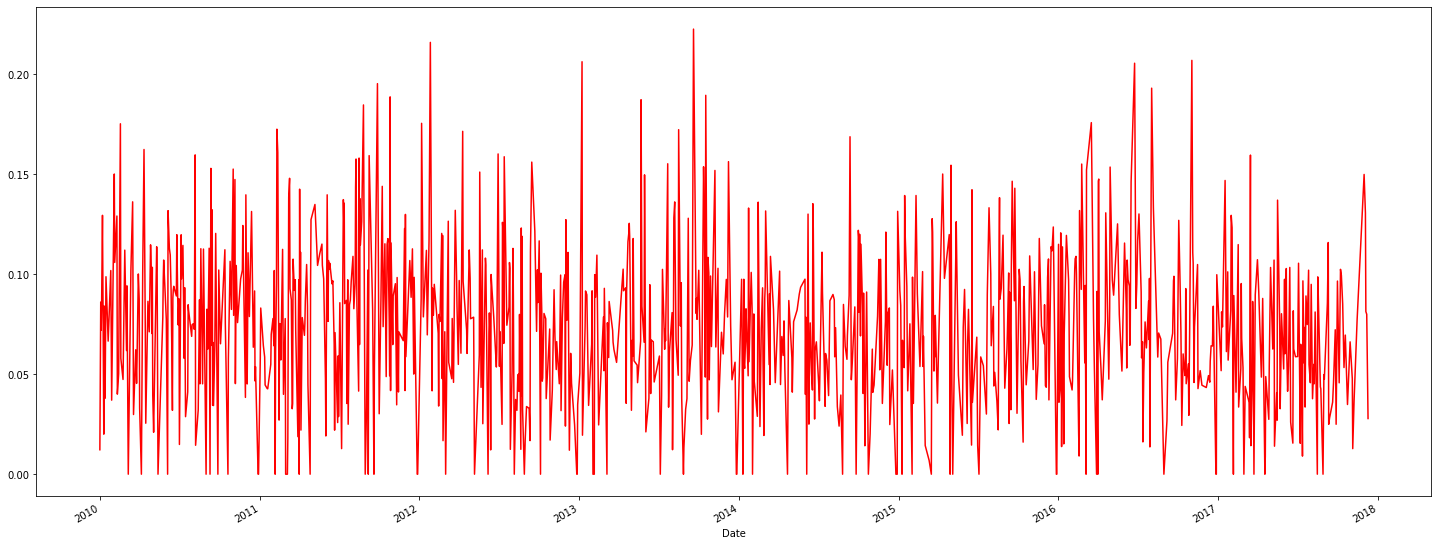

In [31]:
df1['Gold Investments'].plot(figsize=(25,10),color='r')

## Seasonal ARIMA

In [32]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [33]:
model=sm.tsa.statespace.SARIMAX(df1['Gold Investments'].dropna(),order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Gold Investments   No. Observations:                 1022
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1778.421
Date:                            Fri, 23 Oct 2020   AIC                          -3546.842
Time:                                    21:46:00   BIC                          -3522.259
Sample:                                         0   HQIC                         -3537.503
                                           - 1022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0335      0.030      1.111      0.266      -0.026       0.093
ma.L1         -0.9737      0.008   -122.512      0.000      -0.989      -0.958
ar.S.L12       0.0119      0.033      0.359      0.720      -0.053       0.077
ma.S.L12      -0.9869      0.032    -31.121      0.000      -1.049      -0.925
sigma2         0.0016   8.13e-05     20.231      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       61.64   Jarque-Bera (JB):                 8.97
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                             0.21
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

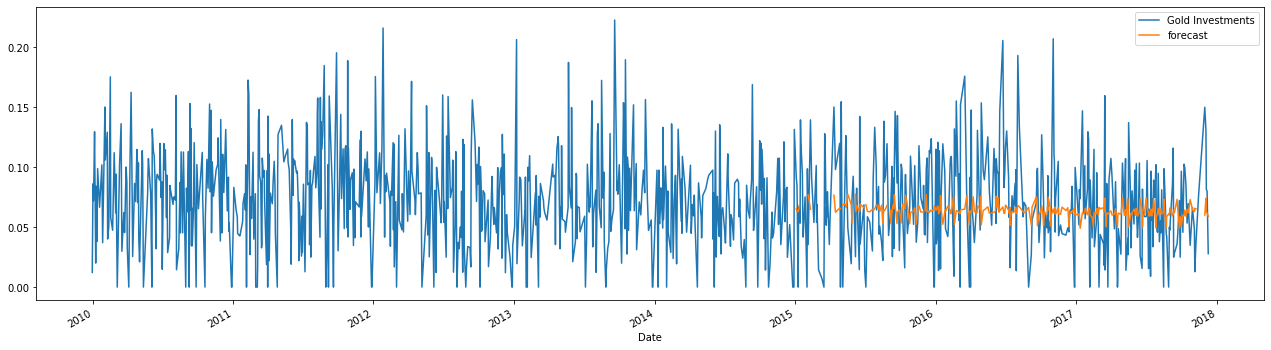

In [35]:
df1['forecast'] = results.predict(start=700,end=1020,dynamic=True)
df1[['Gold Investments','forecast']].plot(figsize=(22,6))
plt.show()

## Now creating some data to predict future of this

In [36]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1] + DateOffset(months=x)for x in range(0,36)]

In [37]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [38]:
future_datest_df1.tail()

,Gold Investments,forecast
2020-06-15,NaN,NaN
2020-07-15,NaN,NaN
2020-08-15,NaN,NaN
2020-09-15,NaN,NaN
2020-10-15,NaN,NaN


In [39]:
future_df1=pd.concat([df1,future_datest_df1])

In [40]:
future_df1.index

DatetimeIndex(['2009-12-31', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-11-01', '2010-01-14', '2010-01-19',
               '2010-01-25', '2010-01-27',
               ...
               '2020-01-15', '2020-02-15', '2020-03-15', '2020-04-15',
               '2020-05-15', '2020-06-15', '2020-07-15', '2020-08-15',
               '2020-09-15', '2020-10-15'],
              dtype='datetime64[ns]', length=1057, freq=None)

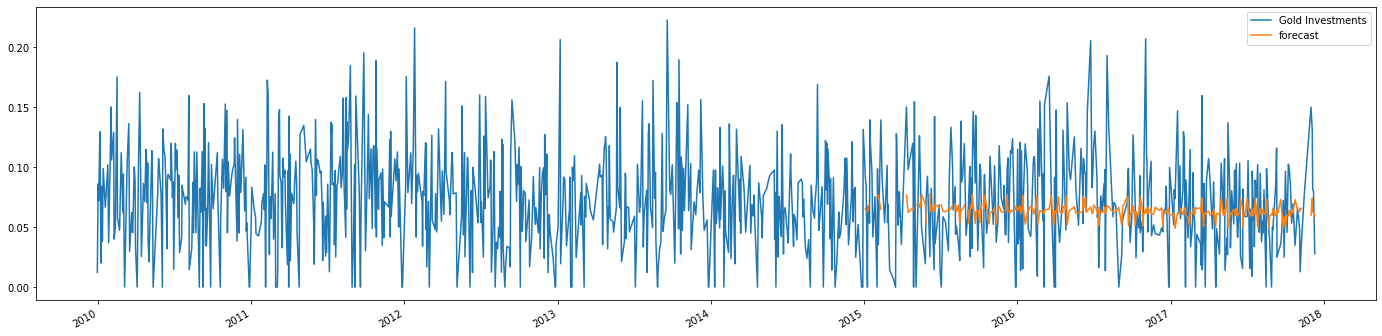

In [41]:
future_df1['forecast'] = results.predict(start = 700, end = 1020, dynamic= True)  
future_df1[['Gold Investments', 'forecast']].plot(figsize=(24,6))
plt.show()

## END